In [2]:
import skimage as ski
from skimage import io, transform
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [7]:
!ls classification/*

classification/Belgium:
test  train

classification/GTSRB:
Readme-Images-Final-test.txt  Readme-Images.txt  test  train

classification/TSRD:
test  train  TsignRecgTest1994Annotation.txt  TsignRecgTrain4170Annotation.txt


# Belgium

In [23]:
img = cv2.imread('./classification/Belgium/train/00001/00025_00000.ppm')[...,::-1]

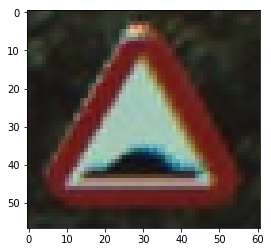

In [24]:
plt.imshow(img)

In [32]:
are_all_classes_same = True
for folder in os.listdir('./classification/Belgium/train/'):
    if '.' not in folder:
        df_annot = pd.read_csv(f'./classification/Belgium/train/{folder}/GT-{folder}.csv', sep=';')
        are_all_classes_same = are_all_classes_same and (len(df_annot.ClassId.unique()) == 1) and df_annot.ClassId.iloc[0]==int(folder)
are_all_classes_same

True

In [3]:
images_per_class = dict()
for folder in os.listdir('./classification/Belgium/train/'):
    if '.' not in folder:
        class_id = int(folder)
        imgs = os.listdir(f'./classification/Belgium/train/{folder}')
        img = cv2.imread(f'./classification/Belgium/train/{folder}/{imgs[1]}')[...,::-1]
        images_per_class[class_id] = img

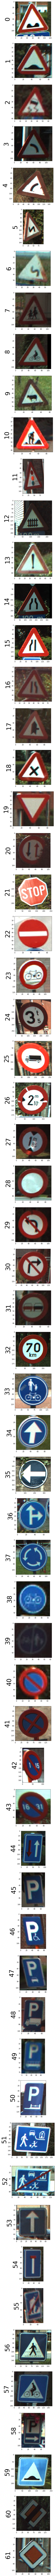

In [4]:
fig, ax = plt.subplots(nrows=len(images_per_class), figsize = (5,5*len(images_per_class)))

for i, cls_id in enumerate(sorted(images_per_class.keys())):
    ax[i].imshow(images_per_class[cls_id])
    ax[i].set_ylabel(cls_id, fontsize=40)

In [74]:
belgium_classes = {
    0:  'bumpy_road',
    1:  'speed_bump',
    2:  'slippery_road',
    3:  'bend_left',
    4:  'bend_right',
    5:  'bends_first_left',
    6:  'bends_first_right',
    7:  'children',
    8:  'cyclist',
    9:  'cow',
    10: 'roadworks',
    11: 'traffic_lights',
    12: 'crossing_with_barriers',
    13: 'hazard',
    14: 'road_narrows',
    15: 'road_narrows_left',
    16: 'road_narrows_right',
    17: 'junction_with_minor',
    18: 'junction_equal',
    19: 'give_way',
    20: 'priority_oncoming',
    21: 'stop',
    22: 'no_entry',
    23: 'no_cycles',
    24: 'max_weight',
    25: 'no_trucks',
    26: 'max_width',
    27: 'max_height',
    28: 'closed_both_directions',
    29: 'no_turn_left',
    30: 'no_turn_right',
    31: 'no_overtaking',
    32: 'speed_limit', # different from polish - 'km' units specified
    33: 'cycleway_pavement_combined',
    34: 'straight_ahead_only',
    35: 'left_only',
    36: 'straight_or_right_only',
    37: 'roundabout',
    38: 'cycleway',
    39: 'cycleway_pavement_separate',
    40: 'no_parking',
    41: 'no_stopping',
    42: 'no_parking_1st_half_month',
    43: 'no_parking_2nd_half_mo',
    44: 'priority_over_oncoming',
    45: 'parking',
    46: 'parking_for_disabled', # no such thing in Poland ? 
    47: 'parking_for_personal', # no such thing in Poland ? 
    48: 'parking_for_truck', # no such thing in Poland ? 
    49: 'parking_for_bus', # no such thing in Poland ? 
    50: 'parking_on_pavement', # no such thing in Poland ? 
    51: 'residential_area',
    52: 'end_residential_area',
    53: 'one_way',
    54: 'dead_end',
    55: 'end_road_works', # no such thing in Poland
    56: 'pedestrian_crossing',
    57: 'cycle_crossing',
    58: 'parking_right',
    59: 'info_speed_bump',
    60: 'end_priority_road',
    61: 'priority_road'
}

In [5]:
train_classes_count = [0]*62

for folder in os.listdir('./classification/Belgium/train/'):
    if '.' not in folder:
        files = os.listdir(f'./classification/Belgium/train/{folder}')
        train_classes_count[int(folder)] = len(files)-1

<BarContainer object of 62 artists>

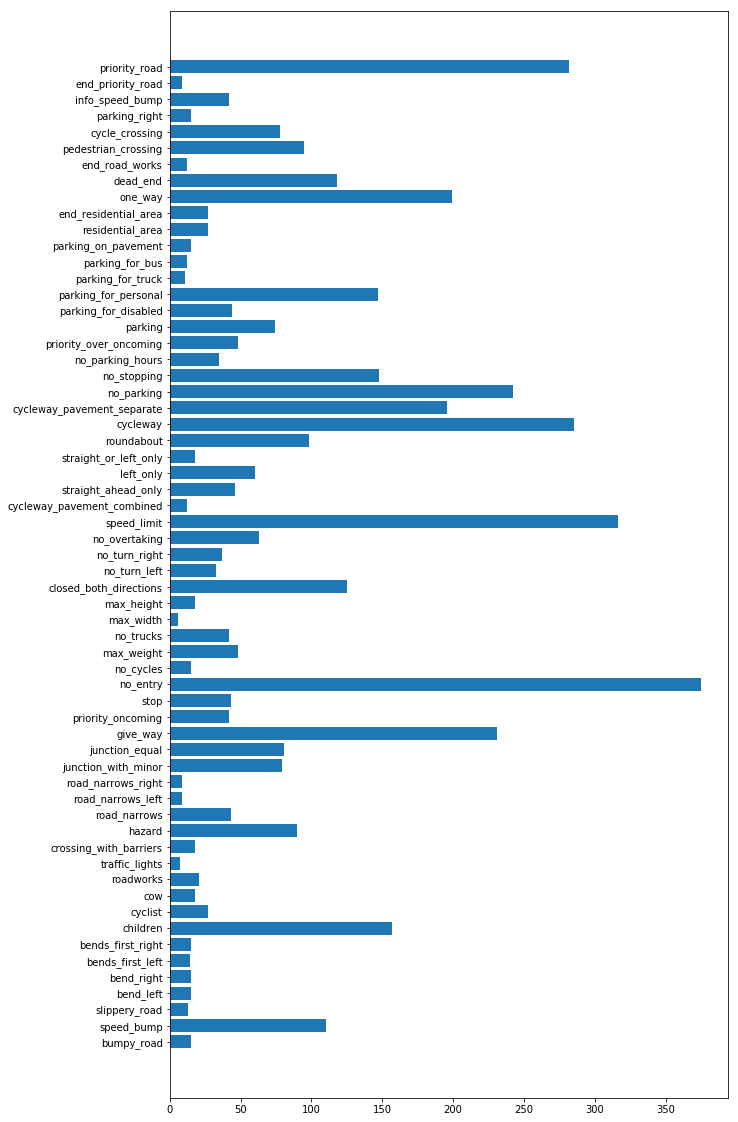

In [19]:
plt.figure(figsize=(10,20))
plt.barh([classes[i] for i in range(62)], train_classes_count)

In [6]:
test_classes_count = [0]*62

for folder in os.listdir('./classification/Belgium/test/'):
    if '.' not in folder:
        files = os.listdir(f'./classification/Belgium/test/{folder}')
        test_classes_count[int(folder)] = len(files)-1

<BarContainer object of 62 artists>

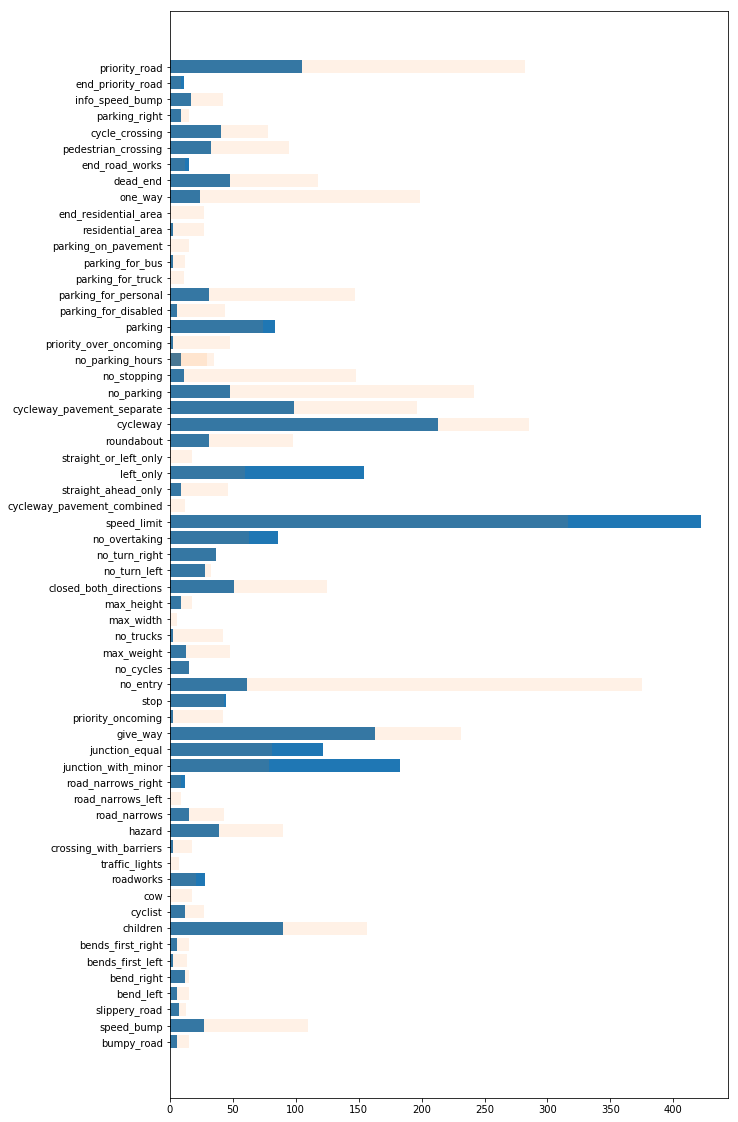

In [26]:
plt.figure(figsize=(10,20))
plt.barh([classes[i] for i in range(62)], test_classes_count)
plt.barh([classes[i] for i in range(62)], train_classes_count, alpha=.1)

# GTSRB

In [20]:
are_all_classes_same = True
for folder in os.listdir('./classification/GTSRB/train/'):
    if '.' not in folder:
        df_annot = pd.read_csv(f'./classification/GTSRB/train/{folder}/GT-{folder}.csv', sep=';')
        are_all_classes_same = are_all_classes_same and (len(df_annot.ClassId.unique()) == 1) and df_annot.ClassId.iloc[0]==int(folder)
are_all_classes_same

True

In [21]:
are_all_classes_same = True
for folder in os.listdir('./classification/GTSRB/test/'):
    if '.' not in folder:
        df_annot = pd.read_csv(f'./classification/GTSRB/test/{folder}/GT-{folder}.csv', sep=';')
        are_all_classes_same = are_all_classes_same and (len(df_annot.ClassId.unique()) == 1) and df_annot.ClassId.iloc[0]==int(folder)
are_all_classes_same

True

In [31]:
images_per_class = dict()
for folder in os.listdir('./classification/GTSRB/train/'):
    if '.' not in folder:
        class_id = int(folder)
        imgs = os.listdir(f'./classification/GTSRB/train/{folder}')
        img = cv2.imread(f'./classification/GTSRB/train/{folder}/{imgs[2]}')[...,::-1]
        images_per_class[class_id] = img

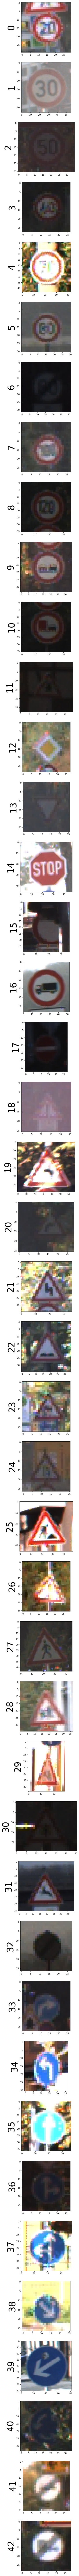

In [32]:
fig, ax = plt.subplots(nrows=len(images_per_class), figsize = (5,5*len(images_per_class)))

for i, cls_id in enumerate(sorted(images_per_class.keys())):
    ax[i].imshow(images_per_class[cls_id])
    ax[i].set_ylabel(cls_id, fontsize=40)

In [33]:
gtsrb_classes = {
    0:  'speed_limit_20',
    1:  'speed_limit_30',
    2:  'speed_limit_50',
    3:  'speed_limit_60',
    4:  'speed_limit_70',
    5:  'speed_limit_80',
    6:  'end_of_speed_limit',
    7:  'speed_limit_100',
    8:  'speed_limit_120',
    9:  'no_overtaking',
    10: 'no_overtaking_by_trucks',
    11: 'junction_with_minor',
    12: 'priority_road',
    13: 'give_way',
    14: 'stop',
    15: 'closed_both_directions',
    16: 'no_trucks',
    17: 'no_entry',
    18: 'hazard',
    19: 'bend_left',
    20: 'bend_right',
    21: 'bends_first_left',
    22: 'bumpy_road',
    23: 'slippery_road',
    24: 'road_narrows_right',
    25: 'roadworks',
    26: 'traffic_lights',
    27: 'warning_pedestrians',
    28: 'children',
    29: 'cyclist',
    30: 'snow',
    31: 'wildlife',
    32: 'end_of_all_prohibitions',
    33: 'right_only',
    34: 'left_only',
    35: 'straight_ahead_only',
    36: 'straight_or_left_only',
    37: 'straight_or_right_only',
    38: 'keep_right',
    39: 'keep_left',
    40: 'roundabout',
    41: 'end_no_overtaking',
    42: 'end_no_overtaking_by_truck'
}

# TSRD

In [49]:
df_annot = pd.read_csv(f'./classification/TSRD/TsignRecgTrain4170Annotation.txt', sep=';',
                       names=['file','1','2','3','4','5','6', 'class_id', 'none'])
df_annot = df_annot.drop(columns=['none'])
df_annot

file    1    2   3   4    5    6  class_id
0       000_0001.png  134  128  19   7  120  117         0
1       000_0002.png  165  151  23  12  149  138         0
2       000_0003.png  128  122  22  14  116  105         0
3       000_0010.png   80   73  14   8   67   63         0
4       000_0011.png  186  174  36  15  155  157         0
5       000_0012.png  186  164  22  15  162  150         0
6       000_0013.png  158  127  31  15  134  113         0
7       000_0014.png  155  125  27  13  132  111         0
8       000_0015.png  156  137  33  15  136  117         0
9       000_0016.png   94   87  17  11   83   75         0
10      000_0017.png  322  302  50  24  281  286         0
11      000_0018.png  212  194  39  14  184  180         0
12      000_0019.png  315  281  51  23  275  257         0
13      000_0020.png  104   90  19  14   85   79         0
14      000_0021.png  108   94  21  13   90   80         0
15      000_0022.png  103   90  19  12   88   78         0
16      000_0023.png  103   92  19  13   87   78         0
17      000_0024.png   96   92  17  14   81   80         0
18      000_0025.png   86   87  13  13   79   76         0
19      000_0026.png  105   99  17   7   92   87         0
20      000_0027.png   84   68  21  13   69   58         0
21      000_0028.png   82   71  16  10   67   59         0
22      000_0029.png   80   69  16  10   64   58         0
23      000_0030.png   72   68  12   9   63   58         0
24      000_0031.png   95   79  20  15   72   65         0
25      000_0032.png   80   64  14   8   64   54         0
26      000_0033.png   65   65  14  15   51   56         0
27      000_0034.png   70   60  15  12   53   53         0
28      000_0035.png   85   75  19  15   67   63         0
29      000_0036.png   57   60  10   9   47   53         0
...              ...  ...  ...  ..  ..  ...  ...       ...
4140  055_1_0071.png  147  129  32  21  110  100        55
4141  055_1_0072.png  155  151  35  26  127  117        55
4142  055_1_0073.png  155  151  34  26  127  118        55
4143  055_1_0074.png  182  179  36  35  147  143        55
4144  055_1_0075.png  182  179  33  32  147  144        55
4145  055_1_0076.png  158  175  33  25  119  141        55
4146  055_1_0077.png  169  180  43  34  124  141        55
4147  055_1_0078.png  235  224  57  48  184  179        55
4148  055_1_0079.png  123  118  31  28   92   91        55
4149  055_1_0080.png  153  150  29  29  123  126        55
4150  056_1_0035.png  196  164  25  31  158  147        56
4151  056_1_0036.png  194  156  28  19  160  135        56
4152  056_1_0037.png  202  172  31  33  164  147        56
4153  056_1_0038.png  218  174  30  21  179  142        56
4154  056_1_0039.png  239  193  30  26  189  161        56
4155  056_1_0040.png  126  112  16  22   97   92        56
4156  056_1_0041.png  120  103  17  15   97   84        56
4157  056_1_0042.png  168  140  32  30  124  111        56
4158  056_1_0043.png  125   89  20  14   96   80        56
4159  056_1_0044.png  148  133  24  22  127  116        56
4160  056_1_0045.png   95   81  10  10   81   70        56
4161  056_1_0046.png  100   86  21  14   82   68        56
4162  056_1_0047.png  104  100  21  28   80   82        56
4163  056_1_0048.png   86   86  20  17   70   62        56
4164  056_1_0049.png  170  158  25  29  151  143        56
4165  056_1_0050.png  106  107  15  23   89   87        56
4166  056_1_0051.png  148  147  20  33  123  122        56
4167  056_1_0052.png  218  182  32  26  185  161        56
4168  056_1_0053.png  100  101  12  18   88   85        56
4169  056_1_0054.png  119  110  11  14  103   95        56

[4170 rows x 8 columns]

In [57]:
(df_annot.file.str.split('_').str.get(0).astype(int) == df_annot.class_id).all()

True

In [66]:
images_per_class = dict()
for file in os.listdir('./classification/TSRD/train/'):
    class_id = int(file.split('_')[0])
    img = cv2.imread(f'./classification/TSRD/train/{file}')[...,::-1]
    images_per_class[class_id] = img

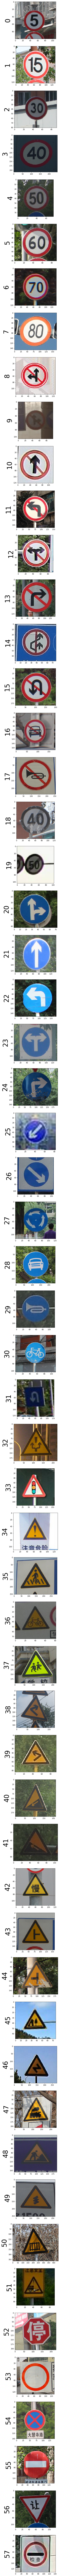

In [67]:
fig, ax = plt.subplots(nrows=len(images_per_class), figsize = (5,5*len(images_per_class)))

for i, cls_id in enumerate(sorted(images_per_class.keys())):
    ax[i].imshow(images_per_class[cls_id])
    ax[i].set_ylabel(cls_id, fontsize=40)

In [70]:
tsrd_classes = {
    0:  'speed_limit_5',
    1:  'speed_limit_15',
    2:  'speed_limit_30',
    3:  'speed_limit_40',
    4:  'speed_limit_50',
    5:  'speed_limit_60',
    6:  'speed_limit_70',
    7:  'speed_limit_80',
    8:  'no_left_and_straight',
    9:  'no_right_and_straight',
    10: 'no_straight',
    11: 'no_turn_left',
    12: 'no_turn_left_and_right',
    13: 'no_turn_right',
    14: 'no_lane_changing', #not existent in Poland
    15: 'no_turn_back',
    16: 'no_cars',
    17: 'no_horns',
    18: 'end_of_speed_limit_40',
    19: 'end_of_speed_limit_50',
    20: 'straight_or_right_only',
    21: 'straight_ahead_only',
    22: 'left_only',
    23: 'left_or_right_only',
    24: 'right_only',
    25: 'keep_left',
    26: 'keep_right',
    27: 'roundabout',
    28: 'cars_only',
    29: 'horn',
    30: 'cycles_only',
    31: 'turn_back',
    32: 'split', #non-existent in Poland,
    33: 'traffic_lights',
    34: 'hazard',
    35: 'warning_pedestrians',
    36: 'warning_cycles',
    37: 'children',
    38: 'bend_right',
    39: 'bend_left',
    40: 'steep_downhill',
    41: 'steep_uphill',
    42: 'chinese', #non-existent in Poland
    43: 'junction_with_minor_right',
    44: 'junction_with_minor_left',
    45: 'home_tree',#non-existent in Poland
    46: 'bends',
    47: 'crossing_without_barriers',
    48: 'roadworks',
    49: 'multiple_bends',
    50: 'crossing_with_barriers',
    51: 'weird_warning', #non-existent in Poland
    52: 'stop',
    53: 'closed_both_directions',
    54: 'no_stopping',
    55: 'no_entry',
    56: 'give_way',
    57: 'customs'
}

In [71]:
import yaml

In [77]:
with open('classification/belgium_classes.yaml', 'w') as f:
    yaml.dump(belgium_classes, f, default_flow_style=False)

In [78]:
with open('classification/GTSRB_classes.yaml', 'w') as f:
    yaml.dump(gtsrb_classes, f, default_flow_style=False)

In [79]:
with open('classification/TSRD_classes.yaml', 'w') as f:
    yaml.dump(tsrd_classes, f, default_flow_style=False)

In [85]:
counts = dict()

for folder in os.listdir('./classification/GTSRB/train'):
    if '.' not in folder:
        counts[gtsrb_classes[int(folder)]] = len(os.listdir('./classification/GTSRB/train/'+folder))
counts

{'bumpy_road': 391,
 'speed_limit_20': 211,
 'speed_limit_30': 2221,
 'speed_limit_50': 2251,
 'speed_limit_60': 1411,
 'speed_limit_70': 1981,
 'speed_limit_80': 1861,
 'end_of_speed_limit': 421,
 'speed_limit_100': 1441,
 'speed_limit_120': 1411,
 'no_overtaking': 1471,
 'no_overtaking_by_trucks': 2011,
 'junction_with_minor': 1321,
 'priority_road': 2101,
 'give_way': 2161,
 'stop': 781,
 'closed_both_directions': 631,
 'no_trucks': 421,
 'no_entry': 1111,
 'hazard': 1201,
 'bend_left': 211,
 'bend_right': 361,
 'bends_first_left': 331,
 'slippery_road': 511,
 'road_narrows_right': 271,
 'roadworks': 1501,
 'traffic_lights': 601,
 'warning_pedestrians': 241,
 'children': 541,
 'cyclist': 271,
 'snow': 451,
 'wildlife': 781,
 'end_of_all_prohibitions': 241,
 'right_only': 690,
 'left_only': 421,
 'straight_ahead_only': 1201,
 'straight_or_left_only': 391,
 'straight_or_right_only': 211,
 'keep_right': 2071,
 'keep_left': 301,
 'roundabout': 361,
 'end_overtaking_ban': 241,
 'end_over